4  January 2025             Saturday


make moons clustering problem-to minimise overfitting values

# TENSORS EXAMPLES

In [ ]:
# scalar(rank 0 tensor)
import numpy as np
a = np.array(10)
type(a)
print(a.ndim)

0


In [ ]:
#  vector (rank 1 tensor)
import numpy as np
a = np.array([10,20,30])
type(a)
print(a.ndim)

1


In [ ]:
# matrices(rank 2 tensor)
import numpy as np
a = np.array([[10,20,30],[40,50,60]])
type(a)
print(a.ndim)

2


In [ ]:
# ndimensional tensors- tensors of higher ranks
import numpy as np
a = np.array([[[10,20,30],[40,50,60]],[[10,20,30],[40,50,60]]])
type(a)
print(a.ndim)

3


In [ ]:
# import tensorflow
import tensorflow
#rank 0
a = tensorflow.constant(10)
print(a)
#rank 1
a = tensorflow.constant([10,20,30])
print(a)
# rank 2
a = tensorflow.constant([[10,20,30],[40,50,60]])
print(a)
# rank 3
a = tensorflow.constant([[[10,20,30],[40,50,60]],[[10,20,30],[40,50,60]]])
print(a)
# rank 5
a = tensorflow.constant([[[[[10,20,30],[40,50,60]]]]])
print(a)

tf.Tensor(10, shape=(), dtype=int32)
tf.Tensor([10 20 30], shape=(3,), dtype=int32)
tf.Tensor(
[[10 20 30]
 [40 50 60]], shape=(2, 3), dtype=int32)
tf.Tensor(
[[[10 20 30]
  [40 50 60]]

 [[10 20 30]
  [40 50 60]]], shape=(2, 2, 3), dtype=int32)
tf.Tensor(
[[[[[10 20 30]
    [40 50 60]]]]], shape=(1, 1, 1, 2, 3), dtype=int32)


----------------------------------------------------------------------------------
MAKE MOONS

In [ ]:
# Overfit of Half moon data - Early stopping

from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd



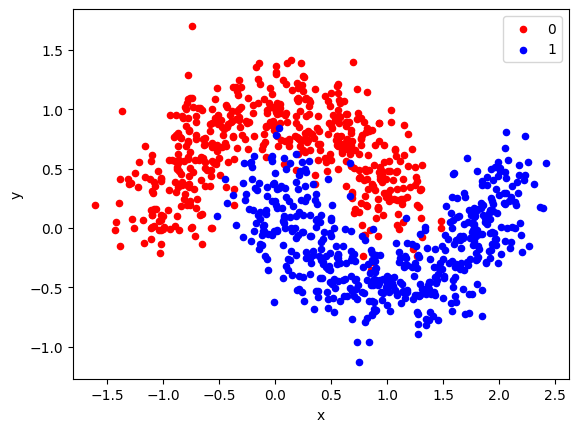

In [ ]:
# load the data
X,y = make_moons(n_samples=1000,noise=0.2,random_state=1)

# scatter plot
df = pd.DataFrame({'x':X[:,0],'y':X[:,1],'label':y})
colors = {0:'red',1:'blue'}
fig,ax = plt.subplots()
grouped = df.groupby('label')
for key,group in grouped:
    group.plot(ax=ax,kind='scatter',x='x',y='y',label=key,color=colors[key])
plt.show()

In [ ]:
df

,x,y,label
0,0.262912,0.224947,1
1,1.382490,-0.710531,1
2,-0.754298,-0.003710,0
3,-0.707382,0.940973,0
4,0.002718,1.292917,0
...,...,...,...
995,1.342471,-0.768107,1
996,1.080362,0.467642,0
997,1.810087,0.160255,1
998,0.199013,0.754941,0


In [ ]:
## overfitted perceptron- multilayer

#split the train and test data
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.7,random_state=42)

In [ ]:
# model creation
model = Sequential()
model.add(Dense(500,input_dim=2,activation='relu')) # single hidden layer
model.add(Dense(1,activation='sigmoid'))# output layer

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# fit the model
history = model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=1000,verbose=0)

In [ ]:
# evaluate
_,train_acc = model.evaluate(X_train,y_train,verbose=0)
_,test_acc = model.evaluate(X_test,y_test,verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

Train: 0.987, Test: 0.954


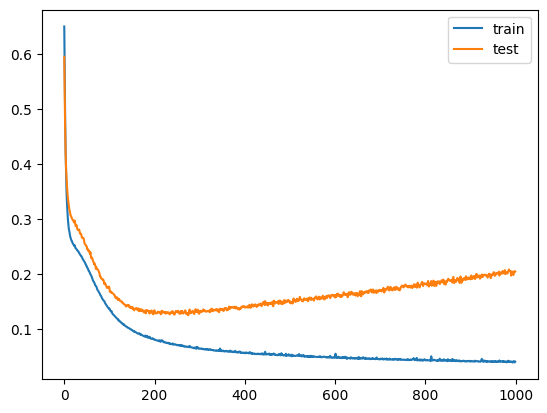

In [ ]:
# plot the loss graph
plt.plot(history.history['loss'],label='train')
plt.plot(history.history['val_loss'],label='test')
plt.legend()
plt.show()

In [ ]:
# Early Stopping
es = EarlyStopping(monitor='val_loss',mode = 'min',verbose=1)

In [ ]:
# re fit the model
history = model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=1000,verbose=0,callbacks=[es])

Epoch 2: early stopping


In [ ]:
#evaluate
_,train_acc = model.evaluate(X_train,y_train,verbose=0)
_,test_acc = model.evaluate(X_test,y_test,verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

Train: 0.983, Test: 0.951


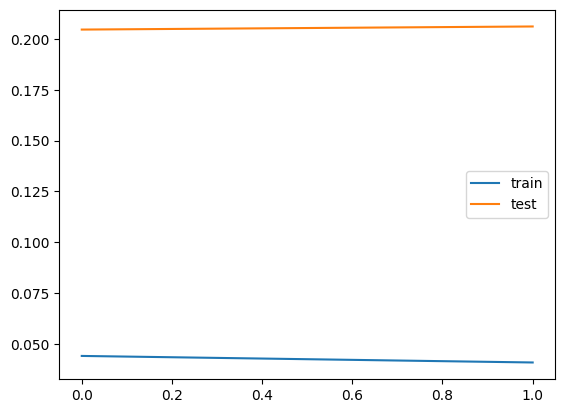

In [ ]:
# plot
plt.plot(history.history['loss'],label='train')
plt.plot(history.history['val_loss'],label='test')
plt.legend()
plt.show()

In [ ]:
# patience
es = EarlyStopping(monitor='val_loss',mode = 'min',verbose=1,patience=50)

In [ ]:
# refit the model
history = model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=1000,verbose=0,callbacks=[es])

Epoch 53: early stopping


In [ ]:
# evaluate
_,train_acc = model.evaluate(X_train,y_train,verbose=0)
_,test_acc = model.evaluate(X_test,y_test,verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

Train: 0.983, Test: 0.954


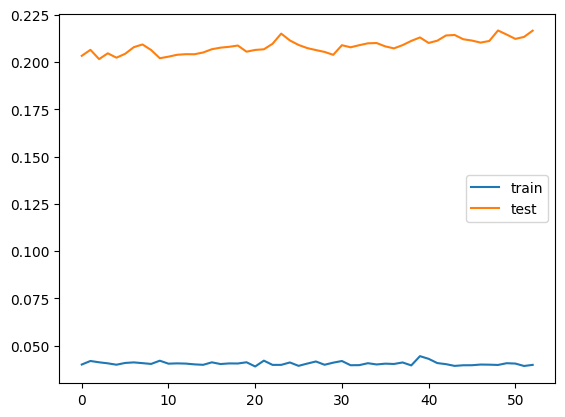

In [ ]:
# plot
plt.plot(history.history['loss'],label='train')
plt.plot(history.history['val_loss'],label='test')
plt.legend()
plt.show()

Model Check point

In [ ]:
# es and mc
from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint
checkpoint_filepath = '/tmp/ckpt/checkpoint.model.keras'
es = EarlyStopping(monitor='val_loss',mode = 'min',verbose=1,patience=250)

mc = ModelCheckpoint(filepath = checkpoint_filepath,monitor='val_accuracy',mode='max',verbose=1,save_best_only=True)



In [ ]:
# refit the model
history= 0
history = model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=1000,verbose=1,callbacks=[es,mc])


Epoch 1/1000
 1/10 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 1.0000 - loss: 0.0318
Epoch 1: val_accuracy improved from -inf to 0.95286, saving model to /tmp/ckpt/checkpoint.model.keras
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9912 - loss: 0.0411 - val_accuracy: 0.9529 - val_loss: 0.2437
Epoch 2/1000
 1/10 ━━━━━━━━━━━━━━━━━━━━ 1s 178ms/step - accuracy: 0.9688 - loss: 0.0406
Epoch 2: val_accuracy did not improve from 0.95286
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9760 - loss: 0.0469 - val_accuracy: 0.9529 - val_loss: 0.2444
Epoch 3/1000
 1/10 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.9688 - loss: 0.0886
Epoch 3: val_accuracy did not improve from 0.95286
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9758 - loss: 0.0557 - val_accuracy: 0.9514 - val_loss: 0.2432
Epoch 4/1000
 1/10 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 1.0000 - loss: 0.0065
Epoch 4: val_accuracy did not improve from 0.95286
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accurac

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.9908 - loss: 0.0454
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9542 - loss: 0.2716
Train: 0.990, Test: 0.956


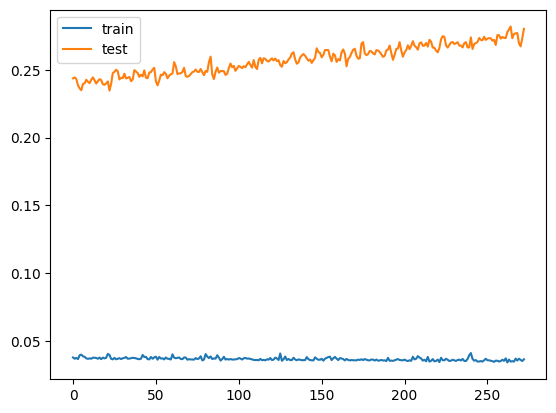

In [ ]:
# load the saved model
from tensorflow.keras.models import load_model
model = load_model(checkpoint_filepath)

#evaluate
_,train_acc = model.evaluate(X_train,y_train,verbose=1)
_,test_acc = model.evaluate(X_test,y_test,verbose=1)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

#plot
plt.plot(history.history['loss'],label='train')
plt.plot(history.history['val_loss'],label='test')
plt.legend()
plt.show()